In [1]:
import os
os.chdir('/home/mgfinley/dev/MAGPRIME')

In [ ]:
from magprime import utility
import numpy as np
import matplotlib.pyplot as plt

# Load CRM data from MAGPRIME
B = utility.load_crm_data()

# Seperate into individual channels
bx = B[0,:]
by = B[1,:]
bz = B[2,:]

# Generate time array
fs = 200 # Sampling rate
bt = np.arange(len(bx)) / fs # Time from start, in seconds

(3, 360000)


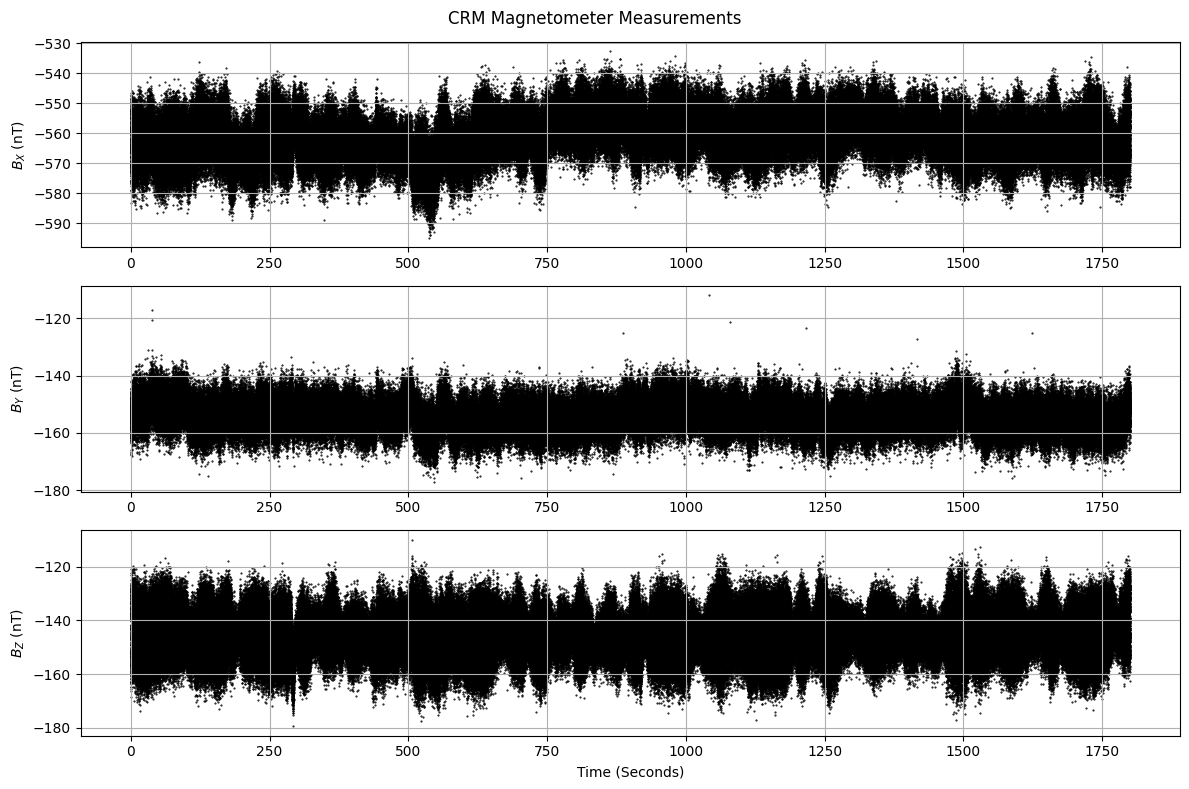

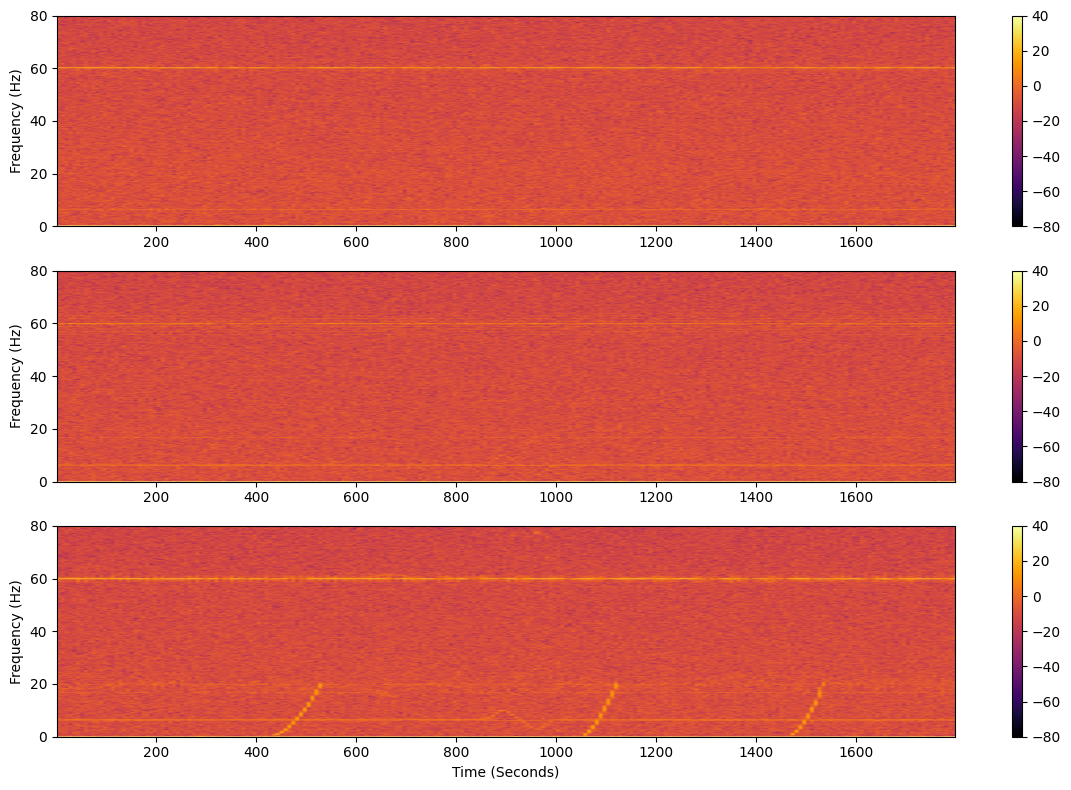

In [ ]:
# Time Series Display
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.scatter(bt, bx, s=1, marker='.', color='black')
plt.ylabel('$B_{X}$ (nT)')
plt.grid()
plt.subplot(312)
plt.scatter(bt, by, s=1, marker='.', color='black')
plt.ylabel('$B_{Y}$ (nT)')
plt.grid()
plt.subplot(313)
plt.scatter(bt, bz, s=1, marker='.', color='black')
plt.ylabel('$B_{Z}$ (nT)')
plt.xlabel('Time (Seconds)')
plt.grid()
plt.suptitle('CRM Magnetometer Measurements')
plt.tight_layout()
plt.show()

# Set some parameters to use in all spectrogram generation
n_overlap = 0
scale_type = 'dB'
n_fft = 2048
clim_upper = 40
clim_lower = -80

# Spectrogram Display
plt.figure(figsize=(12,8))
plt.subplot(311)
s, f, t, im = plt.specgram(bx, NFFT=n_fft, Fs=fs, noverlap=n_overlap, scale=scale_type, cmap='inferno')
plt.ylim(0, 80)
plt.clim(clim_lower, clim_upper)
plt.colorbar()
plt.ylabel('Frequency (Hz)')
plt.subplot(312)
s, f, t, im = plt.specgram(by, NFFT=n_fft, Fs=fs, noverlap=n_overlap, scale=scale_type, cmap='inferno')
plt.ylim(0, 80)
plt.clim(clim_lower, clim_upper)
plt.colorbar()
plt.ylabel('Frequency (Hz)')
plt.subplot(313)
s, f, t, im = plt.specgram(bz, NFFT=n_fft, Fs=fs, noverlap=n_overlap, scale=scale_type, cmap='inferno')
plt.ylim(0, 80)
plt.clim(clim_lower, clim_upper)
plt.colorbar()
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


(1025, 234)


<Figure size 1200x800 with 0 Axes>

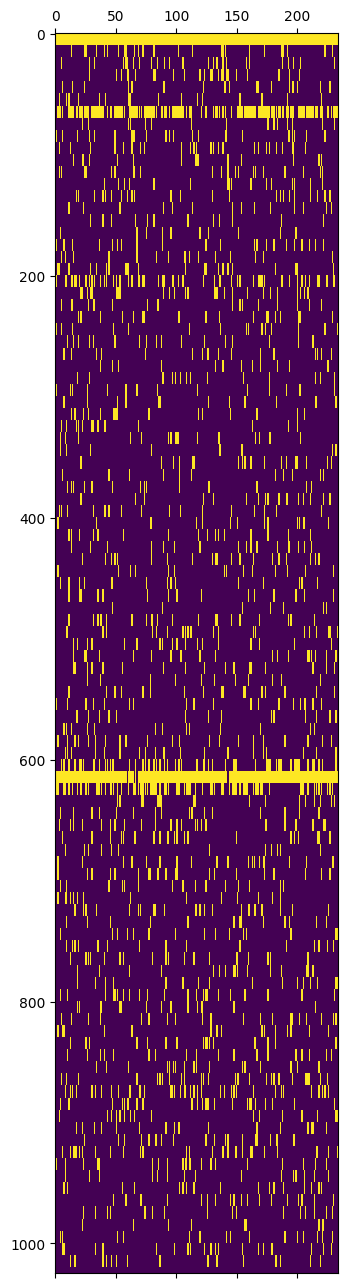

In [26]:
from magprime.algorithms.spectral import AnomalyTracker

print(np.shape(s))
output_image = AnomalyTracker.anomaly_tracker(s, window_length=10, nu=0.1)

plt.figure(figsize=(12,8))
plt.matshow(output_image)
plt.show()

<Figure size 1200x800 with 0 Axes>

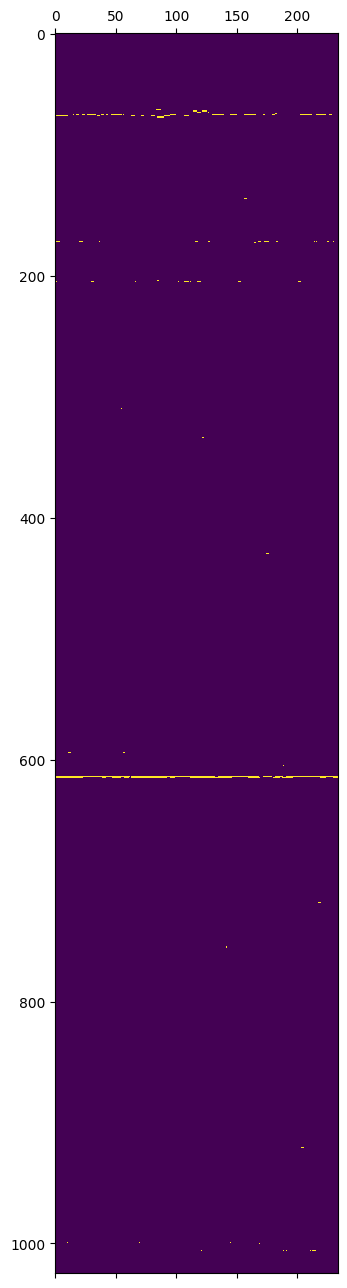

In [28]:
from magprime.algorithms.spectral import LikelihoodRatio

lr_detections = LikelihoodRatio.likelihood_ratio(s, 3)

plt.figure(figsize=(12,8))
plt.matshow(lr_detections)
plt.show()